In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

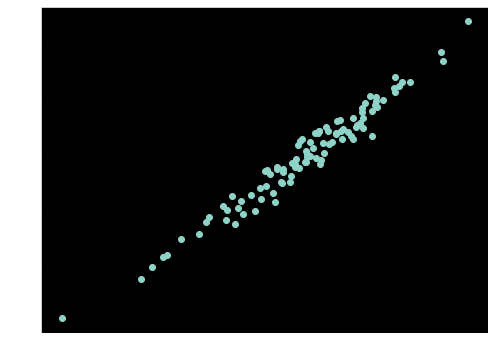

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
from phe import paillier
public_key,private_key=paillier.generate_paillier_keypair()

In [5]:
enc_X_train=[]
for i in X_train:
    row_x=[]
    for j in i:
        k=public_key.encrypt(j)
        row_x.append(k)
    enc_X_train.append(row_x)

In [6]:
enc_y_train=[]
for i in y_train:
    p=public_key.encrypt(i)
    enc_y_train.append(p)

In [7]:
n_samples,n_attributes=X_train.shape
n_samples,n_attributes

(80, 1)

In [8]:
var1=1/n_samples
bias=0
weights=list(np.zeros(n_attributes))
lr=0.01
n_iters=1000

In [9]:
weights

[0.0]

In [10]:
for i in range(len(weights)):
    weights[i]=public_key.encrypt(weights[i])

In [11]:
weights

### Client Side Code:

In [12]:
noise=10

In [13]:
var1=var1*lr*-1
var1

-0.000125

In [14]:
def decrypt_initial_weights(weig):
    for i in range(len(weig)):
        weig[i]=private_key.decrypt(weig[i])
        weig[i]=round(weig[i]*noise,5)

    return weig

In [15]:
def encrypt_prod_res(p_res):
    p_res=p_res*(1/noise)
    return p_res

### Server Side Code:

In [16]:
for _ in range(n_iters):
    print(f"running at {_} iteration")
    weights1=decrypt_initial_weights(weights)
    y_pred_1=[]
    for i in enc_X_train:
        summation=0
        for j,k in zip(i,weights1):
            p=j*k
            p=encrypt_prod_res(p)
            summation=summation+p
        y_pred_1.append(summation)

    y_pred=[]
    for i in y_pred_1:
        p=i+bias
        y_pred.append(p)

    res=[]
    for i,j in zip(y_pred,enc_y_train):
        q=j*(-1)
        p=i+q
        res.append(p)

    # calculating bias:
    db=0
    for i in res:
        db=db+i

    db=db*var1
    bias=bias+db

    # calculating weights:
    res2=decrypt_initial_weights(res)
    wei=[]
    for i,j in zip(enc_X_train,res2):
        row_x=[]
        for k in i:
            p=k*j
            p=encrypt_prod_res(p)
            row_x.append(p)
        wei.append(row_x)

    ww_a1=list(np.zeros(n_attributes))
    for i in range(n_attributes):
        for j in wei:
            ww_a1[i]=ww_a1[i]+j[i]
    
    for i in range(n_attributes):
        ww_a1[i]=ww_a1[i]*var1

    for i in range(n_attributes):
        weights[i]=weights[i]+ww_a1[i]

running at 0 iteration
running at 1 iteration
running at 2 iteration
running at 3 iteration
running at 4 iteration
running at 5 iteration
running at 6 iteration
running at 7 iteration
running at 8 iteration
running at 9 iteration
running at 10 iteration
running at 11 iteration
running at 12 iteration
running at 13 iteration
running at 14 iteration
running at 15 iteration
running at 16 iteration
running at 17 iteration
running at 18 iteration
running at 19 iteration
running at 20 iteration
running at 21 iteration
running at 22 iteration
running at 23 iteration
running at 24 iteration
running at 25 iteration
running at 26 iteration
running at 27 iteration
running at 28 iteration
running at 29 iteration
running at 30 iteration
running at 31 iteration
running at 32 iteration
running at 33 iteration
running at 34 iteration
running at 35 iteration
running at 36 iteration
running at 37 iteration
running at 38 iteration
running at 39 iteration
running at 40 iteration
running at 41 iteration


OverflowError: Overflow detected in decrypted number

In [ ]:
private_key.decrypt(bias)

In [ ]:
for i in weights:
    print(private_key.decrypt(i))